# Applying Fuzzy C-Means (FCM) Clustering to Data
Fuzzy c-means clustering (FCM), like other clustering methods, groups similar objetcs together in clusters. This particular clustering algorithm is done by assigning membership to each data point that corresponds with the cluster centers [1]. The closer the data point is to a cluster center, the more likely it belongs to that cluster [1]. FCM is a soft clustering method, where the probably of a point belonging to a cluster can be any value between 0 and 1, unlike traditional hard clustering methods where the value has to be either 0 or 1. In this study, FCM will be applied to two datasets and the results compared to the previous study done using visual assesment of cluster tendency (VAT) and improved VAT (iVAT).
## Methods
As discussed previously, FCM clustering will be implemented in this study. This clustering algorithm is ideal for overlapped data sets due to its soft clustering approach and comparateively better than some other clustering methods, such as k-means [1]. For this algorithm, the parameters, such as clusters, fuzzier, and the number of iterations need to be defined. The membership matrix is then randomly intialized and the centroids are calculated. The membership matri is then updated and the results are visualized. An outline of the basic FCM process is shown below in the flowchart. In this report, the FCM algorithm was applied to 2 datasets with different cluster values and fuzzier qualifiers.

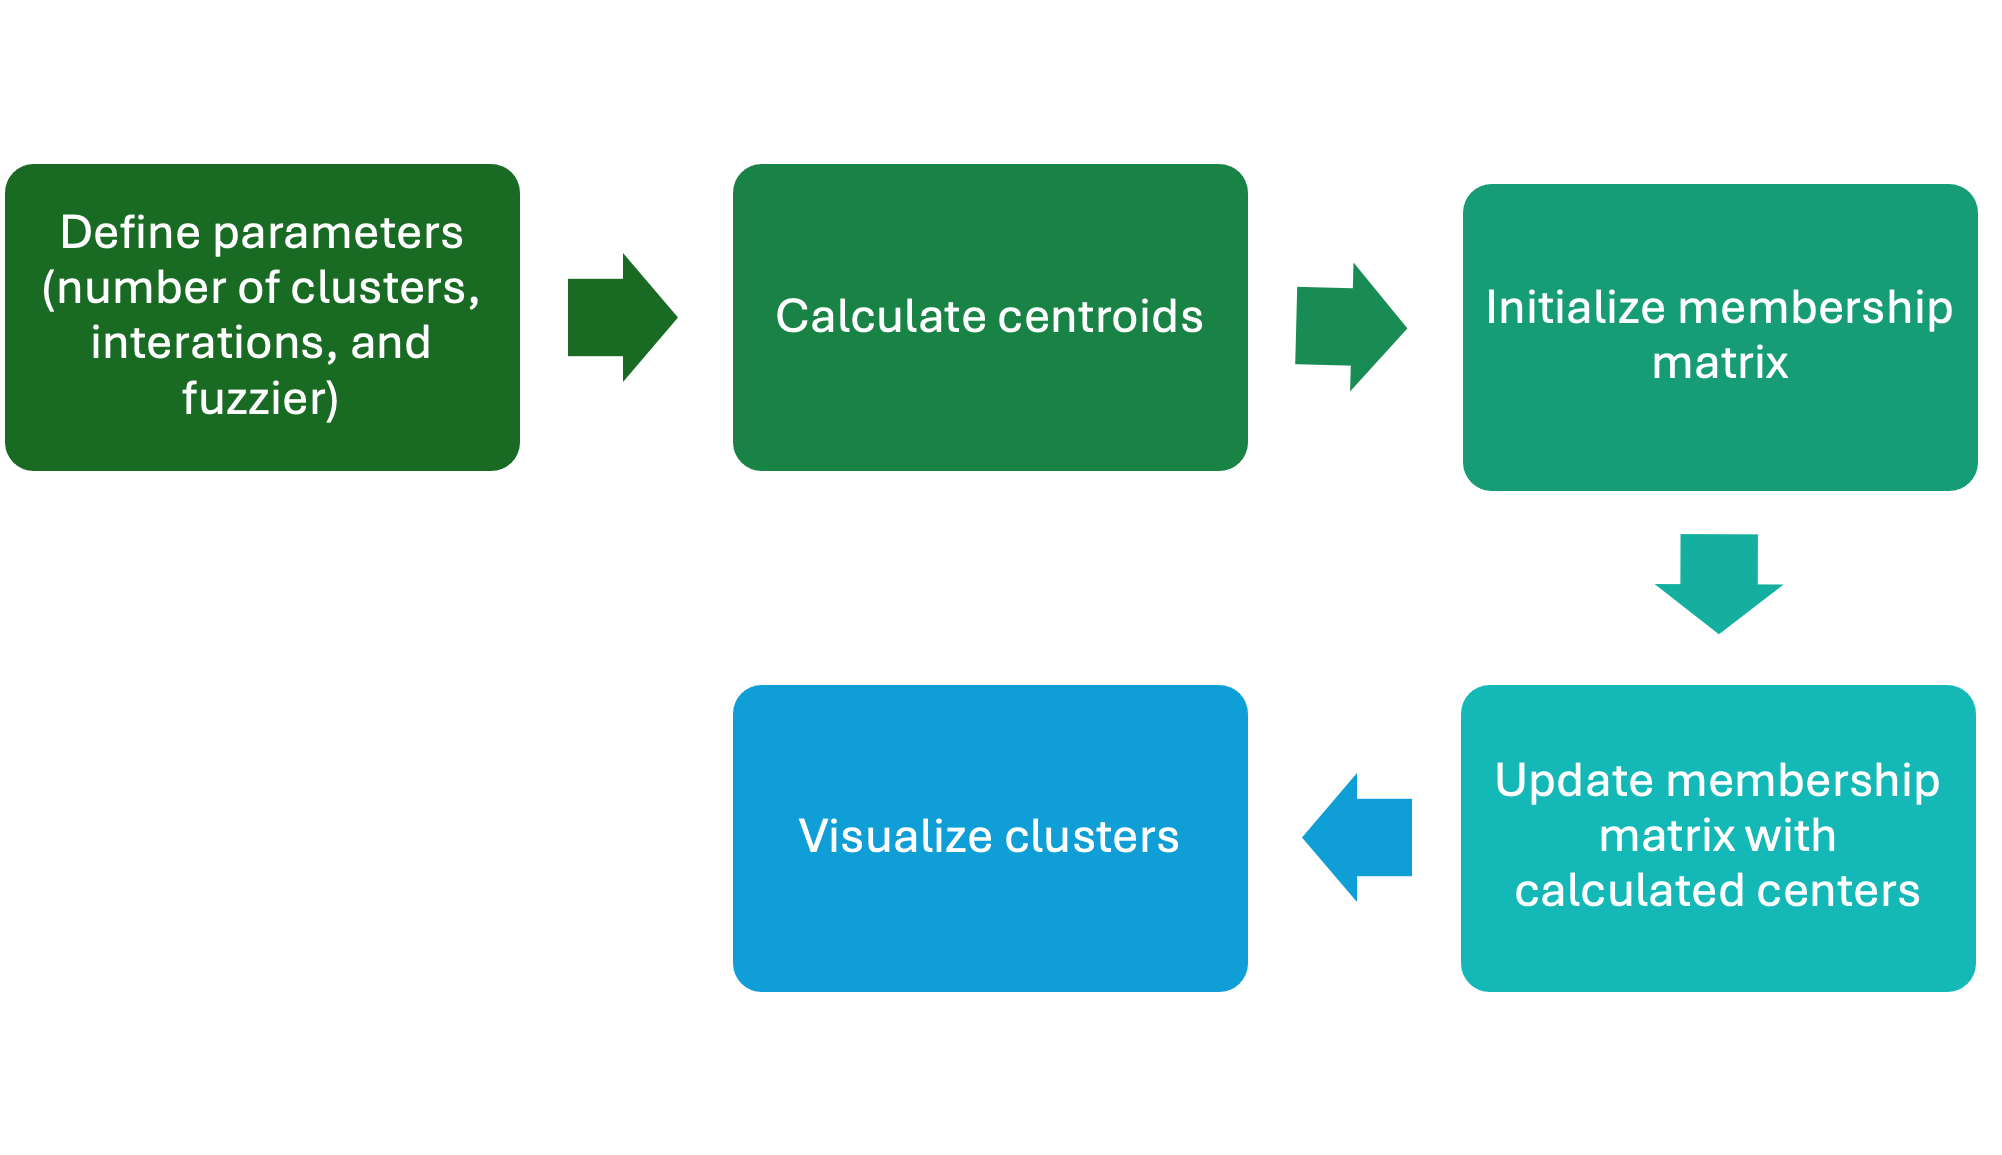

(256, 256)


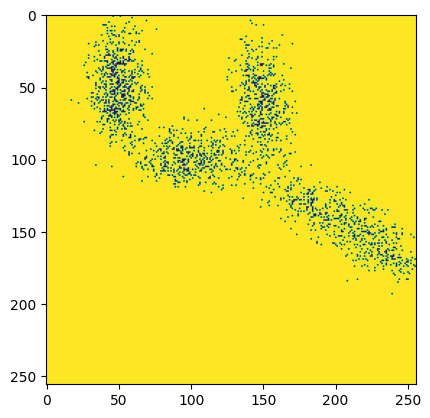

In [ ]:
#Upload first dataset
import matplotlib.pyplot as plt
import numpy as np

#Upload PGM
Image =plt.imread('/4cov.PGM')
print(Image.shape)

plt.imshow(Image);

In [ ]:
#convert PGM to Numpy Array
from numpy import asarray
np_array= np.array(Image)
print(np_array.shape)
print(np_array)


(256, 256)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
#Define parameters
C=5

m=3

U=np.random.rand(np_array.shape[0],C)
U/=np.sum(U, axis=1)[:,np.newaxis]
U


array([[0.11266588, 0.15723815, 0.23010838, 0.4284369 , 0.07155068],
       [0.13689446, 0.21349427, 0.0777306 , 0.15713167, 0.414749  ],
       [0.03620896, 0.29493665, 0.39629   , 0.21467053, 0.05789386],
       ...,
       [0.27668174, 0.34417496, 0.13709952, 0.0097907 , 0.23225309],
       [0.21281645, 0.22570514, 0.20857565, 0.12040124, 0.23250152],
       [0.02648965, 0.16021532, 0.24847681, 0.31598757, 0.24883065]])

In [ ]:
#Calculate centroids
def calc_centroid (np_array, C, U, m):
    Centroids =np.zeros((C,np_array.shape[1]))
    for i in range (C):
        Centroids[i,:]=np.sum((U[:,i]**m)[:,np.newaxis]*np_array, axis=0)/np.sum(U[:,i]**m)
    return Centroids

Centroids= calc_centroid(np_array,C, U, m)

In [ ]:
#Create membership function
def calc_membership (np_array, Centroids, C , m):
    U_new=np.zeros((np_array.shape[0],C))
    for i in range (C):
        U_new[:,i]=np.linalg.norm(np_array-Centroids[i,:],axis=1)

    U_new=1/ (U_new ** (2/(m-1)) * np.sum((1/U_new) ** (2/(m-1)) , axis=1 )[:,np.newaxis] )
    return U_new




In [ ]:
#Calculate membership
U_new= calc_membership(np_array, Centroids, C, m)
#Get labels
labels=np.argmax(U_new, axis=1)
labels

array([0, 0, 0, 0, 0, 0, 2, 4, 4, 0, 0, 2, 3, 4, 2, 2, 2, 0, 4, 3, 4, 2,
       0, 3, 1, 1, 0, 2, 0, 2, 2, 3, 2, 2, 1, 2, 4, 4, 2, 3, 3, 4, 2, 4,
       1, 3, 2, 3, 2, 3, 2, 4, 2, 4, 4, 3, 3, 4, 3, 2, 1, 4, 3, 2, 2, 1,
       2, 2, 2, 4, 2, 4, 4, 1, 3, 4, 2, 2, 4, 4, 2, 3, 3, 2, 3, 3, 0, 3,
       2, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 2, 3, 1, 1, 3,
       1, 3, 3, 1, 0, 4, 3, 0, 3, 1, 4, 1, 1, 3, 0, 0, 4, 0, 0, 4, 0, 0,
       1, 4, 0, 1, 4, 1, 4, 2, 1, 0, 1, 1, 0, 0, 4, 4, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 4, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(254.0, 255.5)

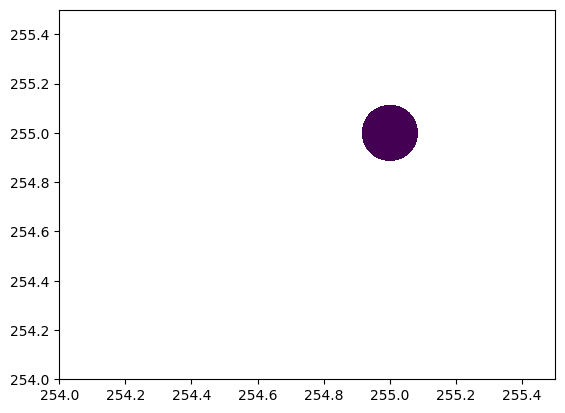

In [ ]:
import matplotlib.pyplot as plt
#Create scatter plot

plt.scatter(np_array[:,0], np_array[:,1], c=labels, s=1500)

plt.xlim(254,255.5)
plt.ylim(254,255.5)

In [ ]:
#Define interations
max_iters=13
for iteration in range (max_iters):
    Centroids=calc_centroid(np_array, 5, U , 3)
    U_new= calc_membership (np_array,Centroids, 5 , 3 )



    if np.linalg.norm (U_new- U)<=0.00001:
        break
    U=U_new

    labels=np.argmax(U_new, axis=1)

(254.0, 255.5)

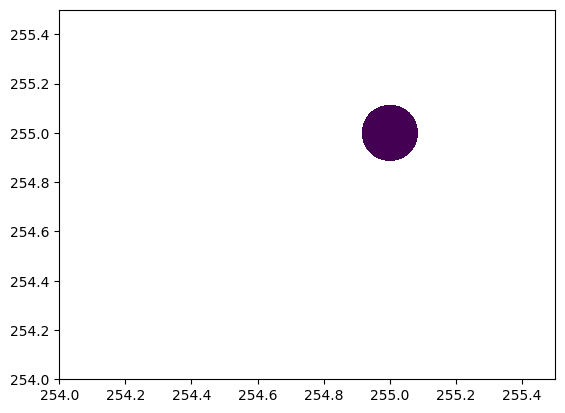

In [ ]:
#Plot with iterations
plt.scatter(np_array[:,0], np_array[:,1], c=labels, s=1500)
plt.xlim(254,255.5)
plt.ylim(254,255.5)

In [ ]:
#Try again with different parameters

C=3

m=2

U=np.random.rand(np_array.shape[0],C)
U/=np.sum(U, axis=1)[:,np.newaxis]
U

array([[3.42496274e-01, 5.76328699e-01, 8.11750264e-02],
       [3.19566243e-01, 1.68883426e-01, 5.11550331e-01],
       [1.59510668e-01, 6.52585468e-01, 1.87903864e-01],
       [4.84135662e-01, 2.26081209e-01, 2.89783128e-01],
       [3.37727975e-01, 4.29591451e-01, 2.32680574e-01],
       [5.53680102e-02, 4.84435693e-01, 4.60196297e-01],
       [3.63343716e-01, 6.30104439e-01, 6.55184523e-03],
       [3.48017948e-01, 3.27074923e-01, 3.24907129e-01],
       [4.47576844e-01, 2.38563031e-03, 5.50037526e-01],
       [3.94720352e-01, 3.88534127e-01, 2.16745521e-01],
       [3.04678626e-01, 5.58146399e-01, 1.37174975e-01],
       [5.93256427e-01, 2.19017228e-02, 3.84841851e-01],
       [4.59207071e-01, 3.81666280e-01, 1.59126649e-01],
       [2.86403575e-01, 1.32350175e-01, 5.81246250e-01],
       [8.88816230e-02, 1.34652279e-01, 7.76466098e-01],
       [3.98808040e-01, 5.42788575e-01, 5.84033853e-02],
       [2.43680524e-01, 5.44566066e-01, 2.11753410e-01],
       [1.70096134e-01, 7.79668

In [ ]:
#Calculate membership
U_new= calc_membership(np_array, Centroids, C, m)
#Get labels
labels=np.argmax(U_new, axis=1)
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 2,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(254.0, 255.5)

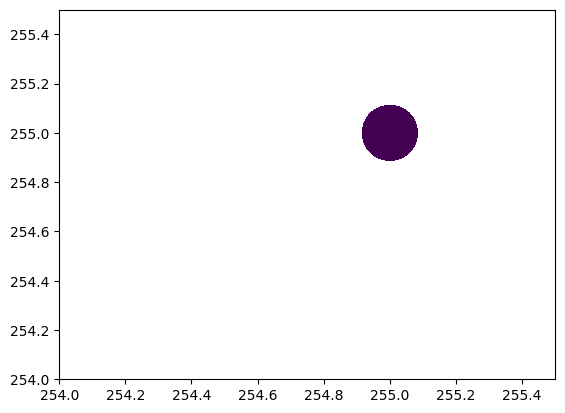

In [ ]:
import matplotlib.pyplot as plt
#Create scatter plot

plt.scatter(np_array[:,0], np_array[:,1], c=labels, s=1500)

plt.xlim(254,255.5)
plt.ylim(254,255.5)

In [ ]:
#Define interations
max_iters=25
for iteration in range (max_iters):
    Centroids=calc_centroid(np_array, 3, U , 2)
    U_new= calc_membership (np_array,Centroids, 3 , 2)



    if np.linalg.norm (U_new- U)<=0.00001:
        break
    U=U_new

    labels=np.argmax(U_new, axis=1)

(254.0, 255.5)

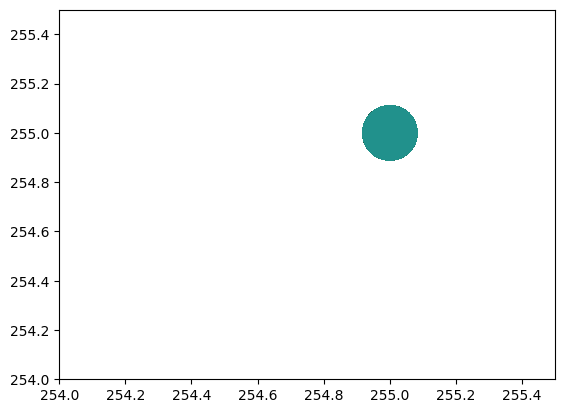

In [ ]:
#Plot with iterations
plt.scatter(np_array[:,0], np_array[:,1], c=labels, s=1500)
plt.xlim(254,255.5)
plt.ylim(254,255.5)

## Second Dataset

(256, 256)


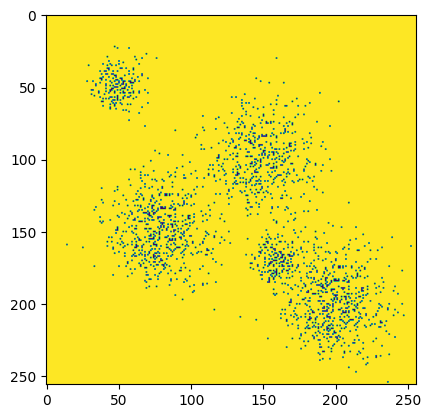

In [ ]:
#import second dataset
import matplotlib.pyplot as plt
import numpy as np

#Upload PGM
Image =plt.imread('/Five_Clust.PGM')
print(Image.shape)

plt.imshow(Image);

In [ ]:
#convert PGM to Numpy Array
from numpy import asarray
np_array_2 = np.array(Image)
print(np_array_2.shape)
print(np_array_2)

(256, 256)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
#Define parameters
C=5

m=3

U=np.random.rand(np_array_2.shape[0],C)
U/=np.sum(U, axis=1)[:,np.newaxis]
U

array([[0.23020791, 0.01282377, 0.21491911, 0.29945963, 0.24258958],
       [0.1143814 , 0.30237264, 0.03006941, 0.310451  , 0.24272556],
       [0.02555375, 0.30380546, 0.10950939, 0.32645888, 0.23467252],
       ...,
       [0.17517919, 0.04313965, 0.08599267, 0.64594391, 0.04974458],
       [0.26163899, 0.24989293, 0.15199998, 0.17505318, 0.16141492],
       [0.31126667, 0.12791694, 0.11042195, 0.0684986 , 0.38189583]])

In [ ]:
#Calculate centroids
def calc_centroid (np_array_2, C, U, m):
    Centroids =np.zeros((C,np_array_2.shape[1]))
    for i in range (C):
        Centroids[i,:]=np.sum((U[:,i]**m)[:,np.newaxis]*np_array_2, axis=0)/np.sum(U[:,i]**m)
    return Centroids

Centroids= calc_centroid(np_array_2,C, U, m)

In [ ]:
#Create membership function
def calc_membership (np_array_2, Centroids, C , m):
    U_new=np.zeros((np_array_2.shape[0],C))
    for i in range (C):
        U_new[:,i]=np.linalg.norm(np_array_2-Centroids[i,:],axis=1)

    U_new=1/ (U_new ** (2/(m-1)) * np.sum((1/U_new) ** (2/(m-1)) , axis=1 )[:,np.newaxis] )
    return U_new

In [ ]:
#Calculate membership
U_new= calc_membership(np_array_2, Centroids, C, m)
#Get labels
labels=np.argmax(U_new, axis=1)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 3,
       0, 3, 3, 2, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 1, 0, 1, 3, 0, 4, 3,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 4, 0, 0, 3, 0, 0, 0, 1, 4, 4, 0, 3, 3,
       4, 1, 0, 0, 0, 1, 2, 1, 4, 1, 1, 0, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1,
       3, 3, 1, 3, 4, 1, 0, 3, 0, 4, 3, 3, 4, 4, 0, 4, 3, 2, 3, 4, 1, 0,
       3, 3, 4, 1, 2, 3, 2, 1, 4, 3, 2, 4, 4, 4, 0, 0, 4, 4, 2, 4, 4, 2,
       3, 4, 0, 1, 3, 1, 4, 4, 4, 4, 2, 4, 4, 4, 1, 1, 4, 1, 3, 2, 4, 2,
       1, 1, 4, 4, 1, 4, 1, 4, 2, 1, 0, 0, 2, 2, 2, 2, 2, 4, 4, 4, 0, 2,
       2, 1, 2, 2, 1, 4, 2, 2, 4, 0, 0, 1, 2, 1, 2, 1, 4, 4, 0, 2, 0, 0,
       0, 2, 1, 0, 4, 0, 2, 2, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

(254.0, 256.0)

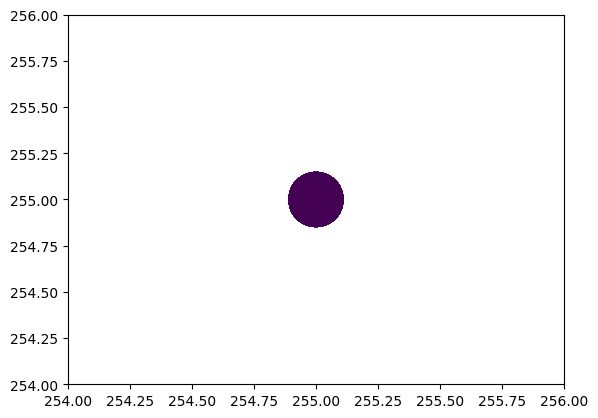

In [ ]:
import matplotlib.pyplot as plt
#Create scatter plot

plt.scatter(np_array_2[:,0], np_array_2[:,1], c=labels, s=1500)

plt.xlim(254,256)
plt.ylim(254,256)

In [ ]:
#Define interations
max_iters=15
for iteration in range (max_iters):
    Centroids=calc_centroid(np_array_2, 5, U , 3)
    U_new= calc_membership (np_array_2,Centroids, 5 , 3)



    if np.linalg.norm (U_new- U)<=0.00001:
        break
    U=U_new

    labels=np.argmax(U_new, axis=1)

(254.0, 255.5)

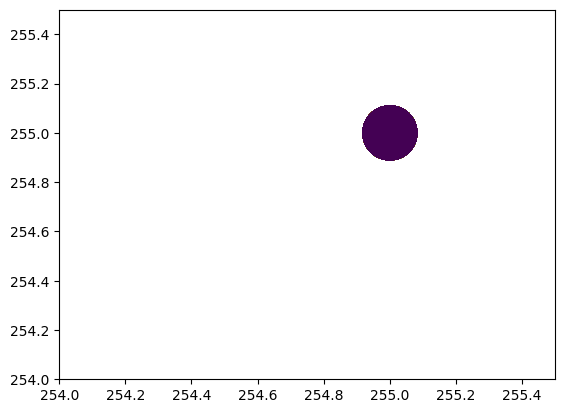

In [ ]:
#Plot with iterations
plt.scatter(np_array_2[:,0], np_array_2[:,1], c=labels, s=1500)
plt.xlim(254,255.5)
plt.ylim(254,255.5)

In [ ]:
#Try with differt cluster and m values

C=3

m=2

U=np.random.rand(np_array_2.shape[0],C)
U/=np.sum(U, axis=1)[:,np.newaxis]
U

array([[0.21625365, 0.50407363, 0.27967272],
       [0.30175045, 0.28208839, 0.41616116],
       [0.44695932, 0.36497526, 0.18806541],
       [0.16924632, 0.46729464, 0.36345904],
       [0.22553878, 0.3932008 , 0.38126042],
       [0.06958423, 0.55318111, 0.37723466],
       [0.37522327, 0.39147031, 0.23330642],
       [0.14826687, 0.35658237, 0.49515075],
       [0.13927932, 0.30261396, 0.55810672],
       [0.04460992, 0.42244303, 0.53294705],
       [0.32110829, 0.01742927, 0.66146244],
       [0.30287998, 0.55008973, 0.1470303 ],
       [0.07601152, 0.41905545, 0.50493303],
       [0.15400382, 0.54267498, 0.3033212 ],
       [0.45266813, 0.32436428, 0.22296759],
       [0.38522177, 0.23103492, 0.38374331],
       [0.31711169, 0.60921253, 0.07367578],
       [0.4732763 , 0.21496198, 0.31176172],
       [0.27963851, 0.53088173, 0.18947976],
       [0.11188849, 0.84926523, 0.03884628],
       [0.7401555 , 0.16239412, 0.09745039],
       [0.16176812, 0.26000245, 0.57822943],
       [0.

In [ ]:
#Calculate membership
U_new= calc_membership(np_array_2, Centroids, C, m)
#Get labels
labels=np.argmax(U_new, axis=1)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#Define interations
max_iters=20
for iteration in range (max_iters):
    Centroids=calc_centroid(np_array_2, 3, U , 2)
    U_new= calc_membership (np_array_2,Centroids, 3 , 2)



    if np.linalg.norm (U_new- U)<=0.00001:
        break
    U=U_new

    labels=np.argmax(U_new, axis=1)

(254.0, 255.5)

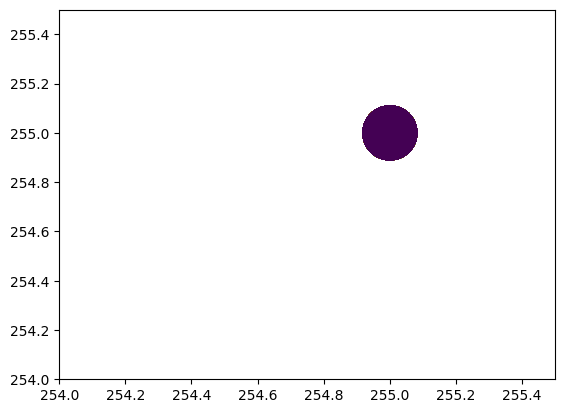

In [ ]:
#Plot with iterations
plt.scatter(np_array[:,0], np_array[:,1], c=labels, s=1500)
plt.xlim(254,255.5)
plt.ylim(254,255.5)

## Results
The first dataset was put through the FCM algorithm with cluster values of 5 and 3, and fuzzier qualifiers of 3 and 2. Both cluster scatter plots showed only 1 cluster. The first dataset was put through the FCM algorithm with cluster values of 5 and 3, and fuzzier qualifiers of 3 and 2. The reuslts of both cluster scatter plots also showed only 1 cluster.
## Discussion and Conclusions
The results of the FCM clustering are consistent with findings of the VAT and iVAT algorithms performed on these datasets in last week's report. However, the scatter plots produced in this analysis indicate that there maybe an issue converting the PGM to a useable array, which could cause the results shown in this report. Another issue could be with plotting the data labels, since the label arrays are showing more than 1 cluster. This issue would need to be clarified before more analysis should be done on the datasets and results found in this study. In conclusion, the results of the FCM clustering and the VAT and iVAT algorithms produced 1 cluster for each dataset.
## References
[1] Gupta, A. (2022, January 30). Fuzzy C-means clustering (FCM) algorithm in Machine Learning. Medium. https://medium.com/geekculture/fuzzy-c-means-clustering-fcm-algorithm-in-machine-learning-c2e51e586fff
